sentiment_analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reviewscompletosin23.csv')

In [3]:
df.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,It's unique and worth a playthrough.
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [4]:
df.isnull().sum()

user_id         33506
user_url        33506
funny           51154
Fecha_posteo    10119
last_edited     53165
item_id             0
helpful             0
recommend           0
review             30
dtype: int64

In [5]:
df.dropna(subset=['review'], inplace=True)


In [24]:
#! pip install textblob



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: C:\Users\W10\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from textblob import TextBlob

# Función para asignar sentimiento
def asignar_sentimiento(texto):
    if isinstance(texto, str):
        analysis = TextBlob(texto)
        sentiment = analysis.sentiment.polarity

        if sentiment > 0.05:
            return 2  # Positivo
        elif sentiment < -0.05:
            return 0  # Malo
        else:
            return 1  # Neutral
    else:
        return 1  # Valor por defecto si no hay reseña escrita


In [7]:
df['sentiment_analysis_textblob'] = df['review'].apply(asignar_sentimiento)


In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Función para asignar sentimiento
def asignar_sentimiento(texto):
    if isinstance(texto, str):
        sentiment = sia.polarity_scores(texto)
        if sentiment['compound'] >= 0.05:
            return 2  # Positivo
        elif sentiment['compound'] <= -0.05:
            return 0  # Malo
        else:
            return 1  # Neutral
    else:
        return 1  # Valor por defecto si no hay reseña escrita


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\W10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Aplicar el análisis de sentimiento y crear la nueva columna
df['sentiment_analysis_vader_lexicon'] = df['review'].apply(asignar_sentimiento)

# Reemplazar la columna original con el análisis de sentimiento
#df.drop(columns=['review'], inplace=True)

In [10]:
import pandas as pd
from pattern.en import sentiment

# Función para asignar sentimiento
def asignar_sentimiento(texto):
    if isinstance(texto, str):
        sentiment_score = sentiment(texto)
        sentiment_value = sentiment_score[0]

        if sentiment_value > 0.05:
            return 2  # Positivo
        elif sentiment_value < -0.05:
            return 0  # Malo
        else:
            return 1  # Neutral
    else:
        return 1  # Valor por defecto si no hay reseña escrita

df['sentiment_analysis_pattern'] = df['review'].apply(asignar_sentimiento)

In [11]:
df.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,review,sentiment_analysis_textblob,sentiment_analysis_vader_lexicon,sentiment_analysis_pattern
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2,2,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,It's unique and worth a playthrough.,2,2,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,1,2,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2,2,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,1,2,1


F1 Score vader: 0.33518112704656233
Precisión (vader): 0.23068747363981443


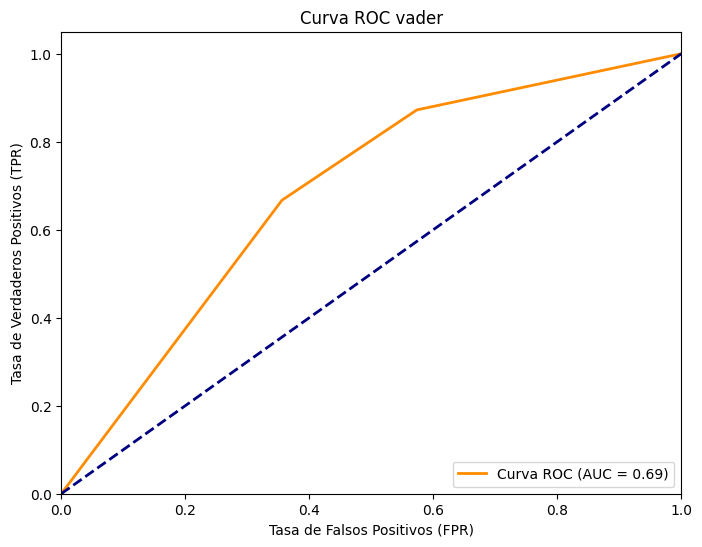

In [12]:
from sklearn.metrics import f1_score

etiquetas_reales = df['recommend'].astype(int)  # Convierte True/False en 1/0
etiquetas_predichas = df['sentiment_analysis_vader_lexicon']

f1 = f1_score(etiquetas_reales, etiquetas_predichas, average='weighted')

print("F1 Score vader:", f1)
from sklearn.metrics import accuracy_score

# Calcular la precisión
precision = accuracy_score(etiquetas_reales, etiquetas_predichas)

print("Precisión (vader):", precision)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(etiquetas_reales, etiquetas_predichas, pos_label=1)  

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(etiquetas_reales, etiquetas_predichas)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC vader')
plt.legend(loc='lower right')
plt.show()


F1 Score pattern: 0.4467648819271767
Precisión (pattern): 0.3263770560944749


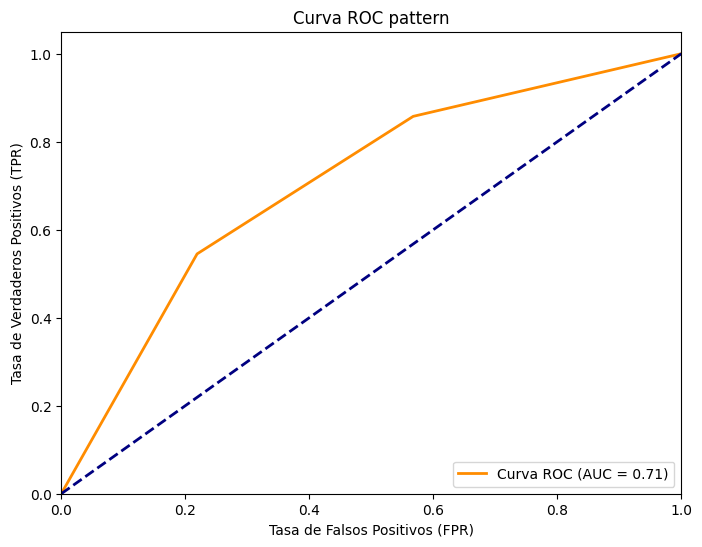

In [14]:
from sklearn.metrics import f1_score

etiquetas_reales = df['recommend'].astype(int)  # Convierte True/False en 1/0
etiquetas_predichas = df['sentiment_analysis_pattern']

f1 = f1_score(etiquetas_reales, etiquetas_predichas, average='weighted')

print("F1 Score pattern:", f1)

# Calcular la precisión
precision = accuracy_score(etiquetas_reales, etiquetas_predichas)

print("Precisión (pattern):", precision)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(etiquetas_reales, etiquetas_predichas, pos_label=1)  

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(etiquetas_reales, etiquetas_predichas)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC pattern')
plt.legend(loc='lower right')
plt.show()


#nos quedamos con pattern


F1 Score texblod: 0.44627840179598854
Precisión (texblod): 0.32568536482496835


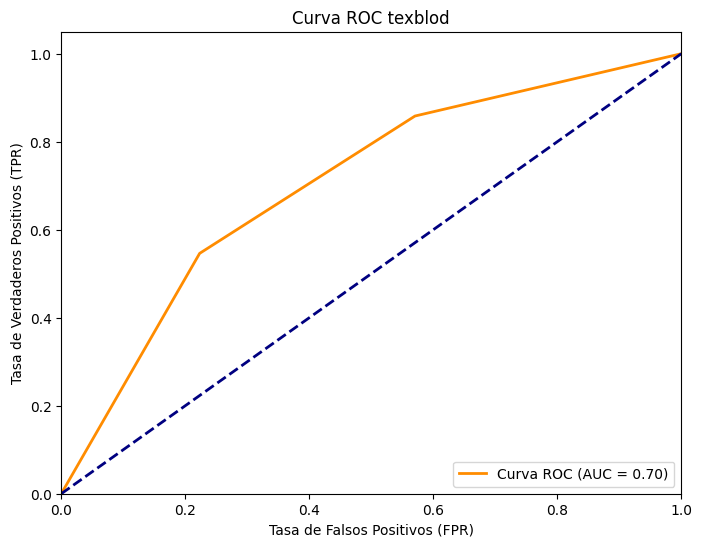

In [15]:

etiquetas_reales = df['recommend'].astype(int)  # Convierte True/False en 1/0
etiquetas_predichas = df['sentiment_analysis_textblob']

f1 = f1_score(etiquetas_reales, etiquetas_predichas, average='weighted')

print("F1 Score texblod:", f1)

# Calcular la precisión
precision = accuracy_score(etiquetas_reales, etiquetas_predichas)

print("Precisión (texblod):", precision)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(etiquetas_reales, etiquetas_predichas, pos_label=1)  

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(etiquetas_reales, etiquetas_predichas)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC texblod')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#! pip install langdetect


     -------------------------------------- 981.5/981.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for langdetect: started
  Running setup.py install for langdetect: finished with status 'done'


  DEPRECATION: langdetect is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: C:\Users\W10\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
from langdetect import detect

# Función para detectar el idioma de un texto
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'Desconocido'  # En caso de que no se pueda detectar el idioma

# Aplica la función a la columna 'texto' y crea una nueva columna 'idioma'
#df['idioma'] = df['review'].apply(detectar_idioma)

# Cuenta las ocurrencias de cada idioma
#conteo_idiomas = df['idioma'].value_counts()

# Muestra la cantidad de cada idioma
#print(conteo_idiomas)


In [ ]:
#! pip install pattern


  DEPRECATION: sgmllib3k is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: pattern is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found a


     ---------------------------------------- 22.2/22.2 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 840.9/840.9 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 200.0/200.0 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 143.0/143.0 kB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 81.1/81.1 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 9.7 MB/s eta 0:00:00
     ------------------------------------- 237.4/237.4 kB 15.1 MB/s eta 0:00:00
     ------------------------------------- 348.4/348.4 kB 10.9 MB/s eta 0:00:00
     -------------------------------------- 101.6/101.6 kB 5.7 MB/s eta 0:00:00

In [18]:
df.drop(columns=['review'], inplace=True)

In [19]:
df.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,sentiment_analysis_textblob,sentiment_analysis_vader_lexicon,sentiment_analysis_pattern
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,2,2,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,2,2,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,1,2,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,2,2,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,1,2,1


In [20]:
# Renombrar la columna
df = df.rename(columns={'sentiment_analysis_pattern': 'sentiment_analysis'})

print(df)


                 user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1                js41637               http://steamcommunity.com/id/js41637   
2              evcentric             http://steamcommunity.com/id/evcentric   
3                  doctr                 http://steamcommunity.com/id/doctr   
4              maplemage             http://steamcommunity.com/id/maplemage   
...                  ...                                                ...   
59300                NaN                                                NaN   
59301                NaN                                                NaN   
59302                NaN                                                NaN   
59303                NaN                                                NaN   
59304                NaN                                                NaN   

                                  funny  Fecha_post

In [21]:
df.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,sentiment_analysis_textblob,sentiment_analysis_vader_lexicon,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,2,2,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,2,2,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,1,2,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,2,2,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,1,2,1


In [22]:
df_reviews = df.drop(['sentiment_analysis_textblob', 'sentiment_analysis_vader_lexicon'], axis=1)


In [23]:
df_reviews

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,1
...,...,...,...,...,...,...,...,...,...
59300,NaN,NaN,NaN,NaN,NaN,70,No ratings yet,True,2
59301,NaN,NaN,NaN,NaN,NaN,362890,No ratings yet,True,2
59302,NaN,NaN,1 person found this review funny,NaN,NaN,273110,1 of 2 people (50%) found this review helpful,True,2
59303,NaN,NaN,NaN,NaN,NaN,730,No ratings yet,True,2


In [ ]:
df_reviews.to_csv('df_reviews_completo3sin23.csv', index=False)
